In [ ]:
import tkinter as tk
from tkinter import messagebox
import random
import matplotlib.pyplot as plt

class TicTacToe:
    def __init__(self, root):
        self.root = root
        self.root.title("Tic-Tac-Toe")

        # Instructions label
        self.instructions_label = tk.Label(root, text="Tic-Tac-Toe Game\nPress 'Space' to toggle vs. computer\nPress 'r' to restart\nPress 'e' to exit", font=('normal', 12))
        self.instructions_label.grid(row=4, column=0, columnspan=3)

        self.board = [[' ' for _ in range(3)] for _ in range(3)]
        self.current_player = 'X'
        self.buttons = [[None, None, None] for _ in range(3)]

        for i in range(3):
            for j in range(3):
                self.buttons[i][j] = tk.Button(root, text=' ', font=('normal', 30), width=6, height=2,
                                               command=lambda i=i, j=j: self.make_move(i, j))
                self.buttons[i][j].grid(row=i, column=j)

        self.game_over = False
        self.vs_computer = False
        self.computer_turn = False

        # Create a label to display game mode
        self.status_label = tk.Label(root, text="Playing against human", font=('normal', 12))
        self.status_label.grid(row=3, column=0, columnspan=3)

        # Track game statistics
        self.player_x_moves = 0
        self.player_o_moves = 0
        self.player_x_wins = 0
        self.player_o_wins = 0
        self.draws = 0

        # Track game outcomes
        self.game_outcomes = []  # List to store game outcomes ('X' wins, 'O' wins, or 'Draw')

        # Bind the spacebar key to toggle_vs_computer
        self.root.bind('<space>', self.toggle_vs_computer)
        self.root.bind('<Key>', self.toggle_vs_computer)  # Added to handle 'r' and 'e' keys

    def start_game(self):
        self.root.mainloop()

    def make_move(self, row, col):
        if self.board[row][col] == ' ' and not self.game_over:
            self.board[row][col] = self.current_player
            self.buttons[row][col].config(text=self.current_player)
            winner = self.check_winner()
            if winner:
                self.display_winner(f"Player {winner} wins!")
                self.game_over = True
                if winner == 'X':
                    self.player_x_wins += 1
                elif winner == 'O':
                    self.player_o_wins += 1
            elif self.is_draw():
                self.display_winner("It's a draw!")
                self.game_over = True
                self.draws += 1
            else:
                self.current_player = 'O' if self.current_player == 'X' else 'X'
                if self.vs_computer and not self.game_over:
                    self.computer_turn = True
                    self.root.after(500, self.computer_move)  # Wait 500ms before computer makes a move

    def check_winner(self):
        for i in range(3):
            if self.board[i][0] == self.board[i][1] == self.board[i][2] != ' ':
                return self.board[i][0]
            if self.board[0][i] == self.board[1][i] == self.board[2][i] != ' ':
                return self.board[0][i]
        if self.board[0][0] == self.board[1][1] == self.board[2][2] != ' ':
            return self.board[0][0]
        if self.board[0][2] == self.board[1][1] == self.board[2][0] != ' ':
            return self.board[0][2]
        return None

    def is_draw(self):
        for row in self.board:
            if ' ' in row:
                return False
        return True

    def display_winner(self, message):
        messagebox.showinfo("Game Over", message)
        # Append the game outcome to the list
        if "Player X wins!" in message:
            self.game_outcomes.append('X')
        elif "Player O wins!" in message:
            self.game_outcomes.append('O')
        else:
            self.game_outcomes.append('Draw')
        self.reset()

    def reset(self):
        self.board = [[' ' for _ in range(3)] for _ in range(3)]
        self.game_over = False
        self.current_player = 'X'
        for i in range(3):
            for j in range(3):
                self.buttons[i][j].config(text=' ')

    def toggle_vs_computer(self, event):
        key = event.keysym.lower()
        if key == 'space':
            self.vs_computer = not self.vs_computer
            if self.vs_computer:
                self.status_label.config(text="Playing against computer")
                if not self.game_over and self.current_player == 'O':
                    self.computer_turn = True
                    self.root.after(500, self.computer_move)  # Wait 500ms before computer makes a move
            else:
                self.status_label.config(text="Playing against human")
        elif key == 'r':
            self.reset()
        elif key == 'e':
            self.root.destroy()  # Close the application when 'e' is pressed

    def computer_move(self):
        if not self.game_over and self.vs_computer and self.current_player == 'O':
            _, best_move = self.minimax(self.board, 'O')  # modified to return a move
            if best_move:  # Check if best_move exists
                row, col = best_move
                self.make_move(row, col)
                self.computer_turn = False
            else:
                messagebox.showinfo("Computer Move", "Computer cannot make a move.")
                self.computer_turn = False

    def minimax(self, board, player):
        # Base cases for the recursion
        winner = self.check_winner()
        if winner == 'O':
            return 1, None
        elif winner == 'X':
            return -1, None
        elif self.is_draw():
            return 0, None

        best_move = None
        if player == 'O':
            best_score = -float('inf')
            for i in range(3):
                for j in range(3):
                    if board[i][j] == ' ':
                        board[i][j] = player
                        score, _ = self.minimax(board, 'X')
                        board[i][j] = ' '
                        if score > best_score:
                            best_score = score
                            best_move = (i, j)
        else:
            best_score = float('inf')
            for i in range(3):
                for j in range(3):
                    if board[i][j] == ' ':
                        board[i][j] = player
                        score, _ = self.minimax(board, 'O')
                        board[i][j] = ' '
                        if score < best_score:
                            best_score = score

        return best_score, best_move

    def visualize_wins(self):
        players = ['Player X', 'Player O', 'Draw']
        wins = [self.player_x_wins, self.player_o_wins, self.draws]

        plt.figure(figsize=(8, 5))
        plt.bar(players, wins, color=['red', 'blue', 'green'])
        plt.xlabel('Players')
        plt.ylabel('Number of Wins/Draws')
        plt.title('Player Wins and Draws')
        plt.show()

    def visualize_game_outcomes(self):
        labels = ['Player X Wins', 'Player O Wins', 'Draw']
        outcome_counts = [
            self.game_outcomes.count('X'),
            self.game_outcomes.count('O'),
            self.game_outcomes.count('Draw')
        ]

        plt.figure(figsize=(6, 6))
        plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', colors=['red', 'blue', 'green'])
        plt.title('Game Outcomes Distribution')
        plt.show()

if __name__ == "__main__":
    root = tk.Tk()
    app = TicTacToe(root)
    app.start_game()


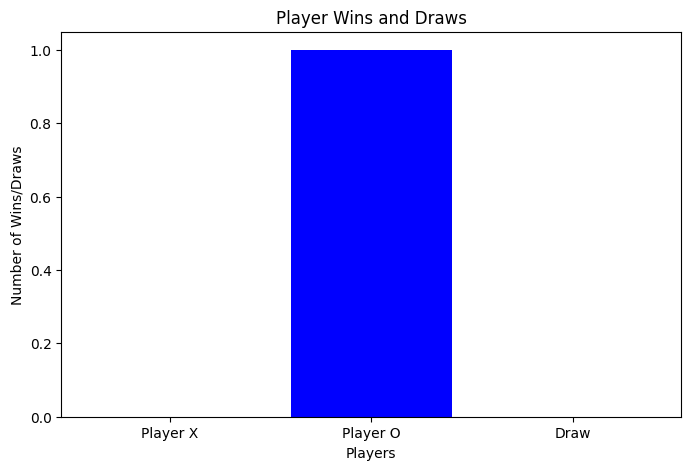

In [38]:
app.visualize_wins()


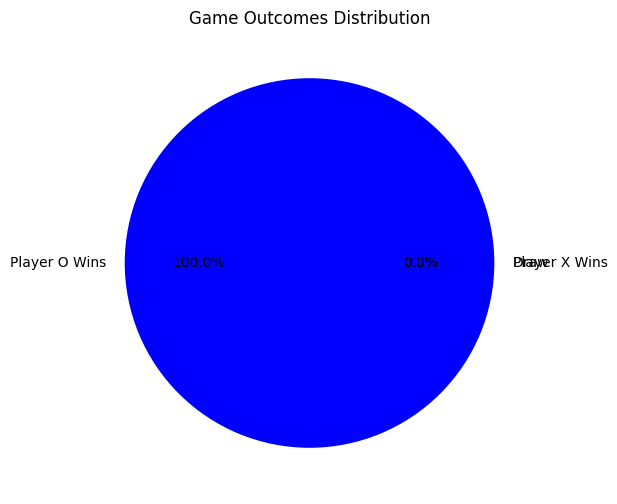

In [39]:
app.visualize_game_outcomes()
